# Experiments with Principal Component Analysis (PCA)

Principal component analysis is a statistical tool to help determine the dimensions of a dataset along which the largest variance occurs, and therefore reduce the relevant dimensionality by a significant margin. Here I am performing the technique on a randomized set of points in R^2 that has then been scaled in both the x and y directions, shifted from the origin by some amount, and rotated through an angle. The data will thus take on the appearance of an ellipse in R^2. If The technique works correctly, PCA will determine the directions of largest variance in the dataset. These should be the major and minor axes of the ellipse. 

The matrix is constructed element-wise in a similar way to constructing scalar variance 

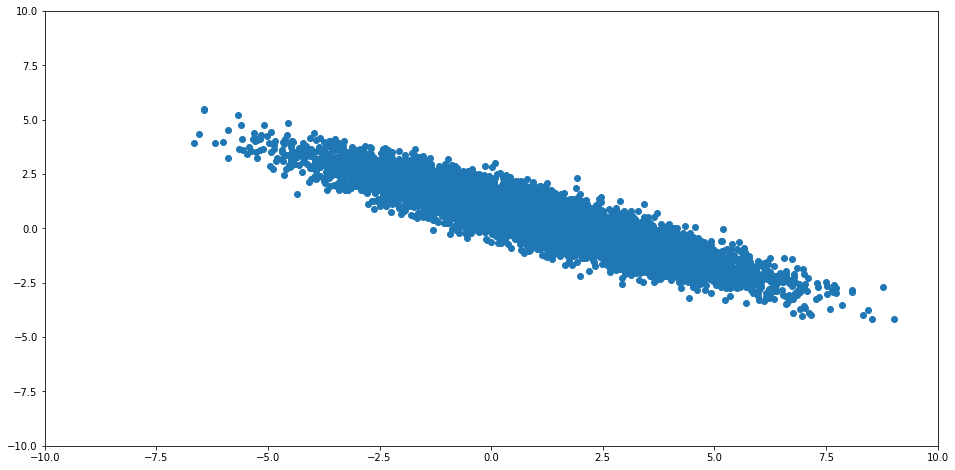

In [67]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,8]

# initialize values

avg = np.array([1,0.5]) # amount to shift randomize data by (artificial mean)
scale_factors = np.array([0.5,2.5]) # scaling in x and y of data
theta = (np.pi / 3) # rotation of data

R = np.array([[np.cos(theta),-np.sin(theta)],
            [np.sin(theta),np.cos(theta)]])   # rotation matrix

num_points = 10000 # number of data points


data = np.random.randn(2,num_points)

data_adj = R @ np.diag(scale_factors) @ data + np.diag(avg) @ np.ones((2,num_points))

x = data_adj[0,0:num_points-1]
y = data_adj[1,0:num_points-1]
plt.scatter(x,y)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()







The dataset has been generated with np.random.randn, which samples points from a gaussian distribution of mean x=y=0. Using PCA, we can determine the vectors of maximum variance.

First we construct our mean subtracted matrix, x_bar.

In [68]:
data_mean = np.mean(data_adj,axis=1) # construct the mean vector. Should approach avg.

B = data_adj - np.tile(data_mean, (num_points,1)).T


Next we compute the SVD of our mean-centered data. U should then give us the rotation, while sigma should give us the scale factors that we used (in other words the perpendicular directions of largest variance and the value of that variance).

In [69]:
U, S, V = np.linalg.svd(B/np.sqrt(num_points),full_matrices=0)

print(U)
print(S)

[[-0.86562929  0.50068547]
 [ 0.50068547  0.86562929]]
[2.49749422 0.49528325]


Note that U approaches our input rotation matrix, while S approaches our input scale factors, as predicted.